## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Handling Imbalance Dataset
## --> 4. Feature Extraction (SPCA) / Component Selection (16)
## --> 5. Data Cleaning (Removing 0 class) 
## --> 6. Normalization (Z Score Normalization)
## --> 7. Train Test Splitting (70% Train , 30% Test)
## --> 8. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 9. Find Training Accuracy
## --> 10. Testing Accuracy

# 1. Load Dataset

### Import Library

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [68]:
#import the package
from spectral import *

In [69]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [70]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [71]:
data.shape

(145, 145, 220)

In [72]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [73]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [74]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [75]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [76]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [77]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [78]:
ground_truth_data.shape

(145, 145)

In [79]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [80]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [81]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [82]:
df = pd.DataFrame(dictionary)

In [83]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [84]:
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [85]:
target.shape


(21025,)

In [86]:
df['target'] = target
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Handling Imbalance Dataset

In [87]:
df['target'].value_counts()


0     10659
11     2468
2      1434
14     1294
10      968
3       834
6       747
12      614
5       497
8       489
15      380
4       234
13      212
16       95
1        54
7        26
9        20
Name: target, dtype: int64

from here it is clear that class no 16 , 1 , 7 and 9 have less number of samples.

In [88]:
total = df['target'].value_counts().sum() - df['target'].value_counts()[0]
total

10366

In [89]:
# total number of extra data
num_of_data_to_be_added = 20000
num_of_data_to_be_added


20000

### functions to generate synthetic samples

In [90]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def generate_synthetic_samples(original_samples, num_samples_to_generate, k_neighbors=5):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k_neighbors)
    nn_model.fit(original_samples)

    synthetic_samples = []

    while len(synthetic_samples) < num_samples_to_generate:
        # Choose a random sample from the minority class
        random_sample_idx = np.random.randint(0, len(original_samples))
        random_sample = original_samples[random_sample_idx]

        # Find the k nearest neighbors of the random sample
        _, neighbors_idx = nn_model.kneighbors(
            [random_sample], n_neighbors=k_neighbors)
        neighbors = original_samples[neighbors_idx[0]]

        # Calculate the mean feature values of neighbors
        mean_features = np.mean(neighbors, axis=0)

        # Create a synthetic sample using feature interpolation
        synthetic_sample = random_sample + \
            np.random.uniform(-0.5, 0.5) * (mean_features - random_sample)
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [91]:
names = []
st = 'band_'
for i in range(220):
    names.append(st+str(i+1))

for i in range(1,17):
    original_samples_class_i = df[df['target'] == i].drop('target', axis=1)
    num_samples_to_generate_class_i = int( len(original_samples_class_i) * num_of_data_to_be_added / total)
    synthetic_samples_class_i = generate_synthetic_samples(original_samples_class_i.values, num_samples_to_generate_class_i)
    synthetic_samples_class_i = pd.DataFrame(data=synthetic_samples_class_i, columns=names)
    synthetic_samples_class_i['target'] = i
    df = df.append(synthetic_samples_class_i, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6636\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6636\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6636\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6636\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthe

### Final df

In [92]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3697.766499  4798.820895  5176.426926  5189.104952  5660.841773   
41014  3662.986541  4772.469882  5260.928660  5186.046776  5817.362872   
41015  3853.028204  4893.559087  5156.249202  5345.161008  5835.761153   
41016  3850.956327  4771.980827  5252.002982  5250.561141  5700.229229   
41017  3708.134561  4767.407066  5089.936015  4994.843884  5550.473248   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6239.766499  6461.339013  6393.912087  6411.669787  6179.430765  ...   
41014  6306.587999  6537.981605  6411.243636  6498.733147  6320.762648  ...   
41015  6212.605502  6451.887183  6421.779363  6477.553730  6204.238487  ...   
41016  6161.622924  6471.038773  6353.438859  6332.645506  6180.740307  ...   
41017  6137.279097  6346.827910  6182.141746  6228.626574  6011.937114  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1073.836813  1066.502200  1062.891209  1050.401648  1046.339013   
41014  1082.464947  1095.356702  1072.750308  1055.179585  1057.464947   
41015  1079.451267  1077.774366  1053.956444  1053.943592  1054.689754   
41016  1063.293566  1077.011291  1059.022582  1046.830635  1057.830635   
41017  1088.720903  1099.172090  1074.032542  1058.290677  1063.430226   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1038.523078  1018.619230  1005.761539  1004.326374      16  
41014  1039.714638  1009.359170  1008.500617  1019.927426      16  
41015  1051.212781  1011.238487  1015.592288  1009.366655      16  
41016  1053.232211  1011.033873  1009.920963  1000.191947      16  
41017  1041.731384  1032.795368  1007.075564  1009.000000      16  

[41018 rows x 221 columns]

In [93]:
df['target'].value_counts()


0     10659
11     7229
2      4200
14     3790
10     2835
3      2443
6      2188
12     1798
5      1455
8      1432
15     1113
4       685
13      621
16      278
1       158
7        76
9        58
Name: target, dtype: int64

In [94]:
# df = df.sample(frac=1, random_state=np.random.seed())
# df


In [95]:
target = df['target']
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [96]:
df = df.drop('target',axis=1)
df

band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3697.766499  4798.820895  5176.426926  5189.104952  5660.841773   
41014  3662.986541  4772.469882  5260.928660  5186.046776  5817.362872   
41015  3853.028204  4893.559087  5156.249202  5345.161008  5835.761153   
41016  3850.956327  4771.980827  5252.002982  5250.561141  5700.229229   
41017  3708.134561  4767.407066  5089.936015  4994.843884  5550.473248   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6239.766499  6461.339013  6393.912087  6411.669787  6179.430765  ...   
41014  6306.587999  6537.981605  6411.243636  6498.733147  6320.762648  ...   
41015  6212.605502  6451.887183  6421.779363  6477.553730  6204.238487  ...   
41016  6161.622924  6471.038773  6353.438859  6332.645506  6180.740307  ...   
41017  6137.279097  6346.827910  6182.141746  6228.626574  6011.937114  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1074.230222  1073.836813  1066.502200  1062.891209  1050.401648   
41014  1095.035670  1082.464947  1095.356702  1072.750308  1055.179585   
41015  1087.817922  1079.451267  1077.774366  1053.956444  1053.943592   
41016  1071.124201  1063.293566  1077.011291  1059.022582  1046.830635   
41017  1102.387203  1088.720903  1099.172090  1074.032542  1058.290677   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1046.339013  1038.523078  1018.619230  1005.761539  1004.326374  
41014  1057.464947  1039.714638  1009.359170  1008.500617  1019.927426  
41015  1054.689754  1051.212781  1011.238487  1015.592288  1009.366655  
41016  1057.830635  1053.232211  1011.033873  1009.920963  1000.191947  
41017  1063.430226  1041.731384  1032.795368  1007.075564  1009.000000  

[41018 rows x 220 columns]

# 4. Feature Extraction (SPCA) / Component Selection

In [97]:
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components=60, alpha=0.1 , n_jobs=-1, random_state=0)
spca.fit(df)
x_spca = spca.transform(df)
x_spca

array([[ 3.80984866e+03,  1.98052867e+03,  2.64342256e+02, ...,
        -7.78459613e+00,  2.12887734e+01,  1.41167736e+01],
       [ 4.44937475e+03, -1.53427519e+03,  5.88823271e+02, ...,
        -8.85297895e+00,  1.51509705e+01, -4.77509446e-01],
       [ 4.67505004e+03, -2.59889387e+03,  6.20077443e+02, ...,
         9.72793633e+00, -1.23663155e+01, -1.58065989e+01],
       ...,
       [ 9.22750844e+03,  1.20786821e+02,  5.00814626e+03, ...,
         6.32494127e+00, -3.19460139e+01,  1.21898733e+01],
       [ 9.13394687e+03,  1.03557408e+03,  5.10454657e+03, ...,
         2.28413711e+00, -9.91773170e-01, -1.56720446e+01],
       [ 7.75627679e+03, -3.02867469e+03,  3.07048389e+03, ...,
        -1.94635762e+01, -5.71824625e+00, -1.33599134e+01]])

it took almost 7 minutes for only 16 components , so instead of taking 220 components like we did in pca , we are selecting
16 components. so 'component selection' section is merged with 'feature extraction' section

In [98]:
print(df.shape)
print(x_spca.shape)

(41018, 220)
(41018, 60)


In [99]:
df = pd.DataFrame(data=x_spca)
df

0            1            2            3           4   \
0      3809.848664  1980.528667   264.342256  -156.908256  -58.820239   
1      4449.374750 -1534.275193   588.823271  -117.897916  127.169741   
2      4675.050035 -2598.893867   620.077443  -106.861637   70.873530   
3      4448.324904 -1888.339996   585.372245  -103.154100   60.575119   
4      3801.498193   781.968533   204.798727  -104.527752  -85.912578   
...            ...          ...          ...          ...         ...   
41013  9096.926257   578.644589  4898.365078  1432.734483 -285.337160   
41014  9491.490244 -3018.753636  4388.683539  1058.655821 -198.336498   
41015  9227.508444   120.786821  5008.146260  1370.355524 -287.969904   
41016  9133.946874  1035.574080  5104.546566  1327.671262 -244.772378   
41017  7756.276787 -3028.674693  3070.483887  1014.352203    4.630349   

               5           6           7           8           9   ...  \
0      -91.466798  226.779071  -71.826860   21.556425   87.680309  ...   
1     -133.109626  101.640976  -18.164015    7.252319  -15.180694  ...   
2      -84.705621 -186.121234  -68.581016  -11.021041 -165.209470  ...   
3       11.347242  -13.620362  -76.796644   -1.375234   15.311383  ...   
4       50.602475  -70.500814 -221.975259  -32.364213  204.897882  ...   
...           ...         ...         ...         ...         ...  ...   
41013   46.245780  268.699214 -147.425581  -13.606972  -96.659884  ...   
41014  -25.207505  277.784291 -152.336558  -91.960478  -39.382900  ...   
41015  232.759673  158.962116  -68.359053  -73.758482 -133.923421  ...   
41016  281.470597  163.707008 -204.309053  -72.392510  -84.559797  ...   
41017  271.020775  161.098275   30.208315 -118.250501   82.810847  ...   

              50         51         52         53         54         55  \
0     -18.981846   2.973235  42.831851 -32.506067  15.155985 -32.915840   
1     -18.632728  29.008160   2.982542  23.751431  10.810163 -35.156429   
2      -5.945837  -3.990722 -13.050104   5.107095 -23.253575 -17.868777   
3      -2.120360 -16.294760 -19.835471  11.567130 -27.560079  -6.952502   
4      -9.982409 -14.699398  -7.747264 -15.698434  10.855622  -3.184084   
...          ...        ...        ...        ...        ...        ...   
41013  -8.651381  -3.426119 -17.788646 -21.125629   4.838746  -9.249367   
41014  24.358342  13.564426 -16.715452   6.638823  -1.702199  31.064774   
41015   0.364170 -18.018440 -19.623547 -44.885807  13.791269 -36.788031   
41016  35.944466   9.888867 -48.493891  -5.049797 -22.665950  35.008499   
41017  18.420873  42.695682  24.958193 -22.202845 -12.059711   4.035737   

              56         57         58         59  
0      -5.946875  -7.784596  21.288773  14.116774  
1       1.587360  -8.852979  15.150971  -0.477509  
2     -22.969387   9.727936 -12.366315 -15.806599  
3       6.848504 -13.417416 -18.313104  -8.516780  
4       8.698079 -10.941121 -11.048876 -26.714089  
...          ...        ...        ...        ...  
41013  -6.274255 -14.250244  11.819485  -2.052894  
41014  11.720182 -45.140679 -12.179632  22.343810  
41015 -13.389460   6.324941 -31.946014  12.189873  
41016  -8.947201   2.284137  -0.991773 -15.672045  
41017 -18.838592 -19.463576  -5.718246 -13.359913  

[41018 rows x 60 columns]

In [100]:
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [101]:
target.shape

(41018,)

In [102]:
df['target'] = target
df

0            1            2            3           4  \
0      3809.848664  1980.528667   264.342256  -156.908256  -58.820239   
1      4449.374750 -1534.275193   588.823271  -117.897916  127.169741   
2      4675.050035 -2598.893867   620.077443  -106.861637   70.873530   
3      4448.324904 -1888.339996   585.372245  -103.154100   60.575119   
4      3801.498193   781.968533   204.798727  -104.527752  -85.912578   
...            ...          ...          ...          ...         ...   
41013  9096.926257   578.644589  4898.365078  1432.734483 -285.337160   
41014  9491.490244 -3018.753636  4388.683539  1058.655821 -198.336498   
41015  9227.508444   120.786821  5008.146260  1370.355524 -287.969904   
41016  9133.946874  1035.574080  5104.546566  1327.671262 -244.772378   
41017  7756.276787 -3028.674693  3070.483887  1014.352203    4.630349   

                5           6           7           8           9  ...  \
0      -91.466798  226.779071  -71.826860   21.556425   87.680309  ...   
1     -133.109626  101.640976  -18.164015    7.252319  -15.180694  ...   
2      -84.705621 -186.121234  -68.581016  -11.021041 -165.209470  ...   
3       11.347242  -13.620362  -76.796644   -1.375234   15.311383  ...   
4       50.602475  -70.500814 -221.975259  -32.364213  204.897882  ...   
...           ...         ...         ...         ...         ...  ...   
41013   46.245780  268.699214 -147.425581  -13.606972  -96.659884  ...   
41014  -25.207505  277.784291 -152.336558  -91.960478  -39.382900  ...   
41015  232.759673  158.962116  -68.359053  -73.758482 -133.923421  ...   
41016  281.470597  163.707008 -204.309053  -72.392510  -84.559797  ...   
41017  271.020775  161.098275   30.208315 -118.250501   82.810847  ...   

              51         52         53         54         55         56  \
0       2.973235  42.831851 -32.506067  15.155985 -32.915840  -5.946875   
1      29.008160   2.982542  23.751431  10.810163 -35.156429   1.587360   
2      -3.990722 -13.050104   5.107095 -23.253575 -17.868777 -22.969387   
3     -16.294760 -19.835471  11.567130 -27.560079  -6.952502   6.848504   
4     -14.699398  -7.747264 -15.698434  10.855622  -3.184084   8.698079   
...          ...        ...        ...        ...        ...        ...   
41013  -3.426119 -17.788646 -21.125629   4.838746  -9.249367  -6.274255   
41014  13.564426 -16.715452   6.638823  -1.702199  31.064774  11.720182   
41015 -18.018440 -19.623547 -44.885807  13.791269 -36.788031 -13.389460   
41016   9.888867 -48.493891  -5.049797 -22.665950  35.008499  -8.947201   
41017  42.695682  24.958193 -22.202845 -12.059711   4.035737 -18.838592   

              57         58         59  target  
0      -7.784596  21.288773  14.116774       3  
1      -8.852979  15.150971  -0.477509       3  
2       9.727936 -12.366315 -15.806599       3  
3     -13.417416 -18.313104  -8.516780       3  
4     -10.941121 -11.048876 -26.714089       3  
...          ...        ...        ...     ...  
41013 -14.250244  11.819485  -2.052894      16  
41014 -45.140679 -12.179632  22.343810      16  
41015   6.324941 -31.946014  12.189873      16  
41016   2.284137  -0.991773 -15.672045      16  
41017 -19.463576  -5.718246 -13.359913      16  

[41018 rows x 61 columns]

# 5. Data Cleaning (Removing 0 class) 

In [103]:
df = df[df['target']!=0]

In [104]:
df

0            1            2            3           4  \
0      3809.848664  1980.528667   264.342256  -156.908256  -58.820239   
1      4449.374750 -1534.275193   588.823271  -117.897916  127.169741   
2      4675.050035 -2598.893867   620.077443  -106.861637   70.873530   
3      4448.324904 -1888.339996   585.372245  -103.154100   60.575119   
4      3801.498193   781.968533   204.798727  -104.527752  -85.912578   
...            ...          ...          ...          ...         ...   
41013  9096.926257   578.644589  4898.365078  1432.734483 -285.337160   
41014  9491.490244 -3018.753636  4388.683539  1058.655821 -198.336498   
41015  9227.508444   120.786821  5008.146260  1370.355524 -287.969904   
41016  9133.946874  1035.574080  5104.546566  1327.671262 -244.772378   
41017  7756.276787 -3028.674693  3070.483887  1014.352203    4.630349   

                5           6           7           8           9  ...  \
0      -91.466798  226.779071  -71.826860   21.556425   87.680309  ...   
1     -133.109626  101.640976  -18.164015    7.252319  -15.180694  ...   
2      -84.705621 -186.121234  -68.581016  -11.021041 -165.209470  ...   
3       11.347242  -13.620362  -76.796644   -1.375234   15.311383  ...   
4       50.602475  -70.500814 -221.975259  -32.364213  204.897882  ...   
...           ...         ...         ...         ...         ...  ...   
41013   46.245780  268.699214 -147.425581  -13.606972  -96.659884  ...   
41014  -25.207505  277.784291 -152.336558  -91.960478  -39.382900  ...   
41015  232.759673  158.962116  -68.359053  -73.758482 -133.923421  ...   
41016  281.470597  163.707008 -204.309053  -72.392510  -84.559797  ...   
41017  271.020775  161.098275   30.208315 -118.250501   82.810847  ...   

              51         52         53         54         55         56  \
0       2.973235  42.831851 -32.506067  15.155985 -32.915840  -5.946875   
1      29.008160   2.982542  23.751431  10.810163 -35.156429   1.587360   
2      -3.990722 -13.050104   5.107095 -23.253575 -17.868777 -22.969387   
3     -16.294760 -19.835471  11.567130 -27.560079  -6.952502   6.848504   
4     -14.699398  -7.747264 -15.698434  10.855622  -3.184084   8.698079   
...          ...        ...        ...        ...        ...        ...   
41013  -3.426119 -17.788646 -21.125629   4.838746  -9.249367  -6.274255   
41014  13.564426 -16.715452   6.638823  -1.702199  31.064774  11.720182   
41015 -18.018440 -19.623547 -44.885807  13.791269 -36.788031 -13.389460   
41016   9.888867 -48.493891  -5.049797 -22.665950  35.008499  -8.947201   
41017  42.695682  24.958193 -22.202845 -12.059711   4.035737 -18.838592   

              57         58         59  target  
0      -7.784596  21.288773  14.116774       3  
1      -8.852979  15.150971  -0.477509       3  
2       9.727936 -12.366315 -15.806599       3  
3     -13.417416 -18.313104  -8.516780       3  
4     -10.941121 -11.048876 -26.714089       3  
...          ...        ...        ...     ...  
41013 -14.250244  11.819485  -2.052894      16  
41014 -45.140679 -12.179632  22.343810      16  
41015   6.324941 -31.946014  12.189873      16  
41016   2.284137  -0.991773 -15.672045      16  
41017 -19.463576  -5.718246 -13.359913      16  

[30359 rows x 61 columns]

In [105]:
x = df[df.columns[:-1]]
x

0            1            2            3           4   \
0      3809.848664  1980.528667   264.342256  -156.908256  -58.820239   
1      4449.374750 -1534.275193   588.823271  -117.897916  127.169741   
2      4675.050035 -2598.893867   620.077443  -106.861637   70.873530   
3      4448.324904 -1888.339996   585.372245  -103.154100   60.575119   
4      3801.498193   781.968533   204.798727  -104.527752  -85.912578   
...            ...          ...          ...          ...         ...   
41013  9096.926257   578.644589  4898.365078  1432.734483 -285.337160   
41014  9491.490244 -3018.753636  4388.683539  1058.655821 -198.336498   
41015  9227.508444   120.786821  5008.146260  1370.355524 -287.969904   
41016  9133.946874  1035.574080  5104.546566  1327.671262 -244.772378   
41017  7756.276787 -3028.674693  3070.483887  1014.352203    4.630349   

               5           6           7           8           9   ...  \
0      -91.466798  226.779071  -71.826860   21.556425   87.680309  ...   
1     -133.109626  101.640976  -18.164015    7.252319  -15.180694  ...   
2      -84.705621 -186.121234  -68.581016  -11.021041 -165.209470  ...   
3       11.347242  -13.620362  -76.796644   -1.375234   15.311383  ...   
4       50.602475  -70.500814 -221.975259  -32.364213  204.897882  ...   
...           ...         ...         ...         ...         ...  ...   
41013   46.245780  268.699214 -147.425581  -13.606972  -96.659884  ...   
41014  -25.207505  277.784291 -152.336558  -91.960478  -39.382900  ...   
41015  232.759673  158.962116  -68.359053  -73.758482 -133.923421  ...   
41016  281.470597  163.707008 -204.309053  -72.392510  -84.559797  ...   
41017  271.020775  161.098275   30.208315 -118.250501   82.810847  ...   

              50         51         52         53         54         55  \
0     -18.981846   2.973235  42.831851 -32.506067  15.155985 -32.915840   
1     -18.632728  29.008160   2.982542  23.751431  10.810163 -35.156429   
2      -5.945837  -3.990722 -13.050104   5.107095 -23.253575 -17.868777   
3      -2.120360 -16.294760 -19.835471  11.567130 -27.560079  -6.952502   
4      -9.982409 -14.699398  -7.747264 -15.698434  10.855622  -3.184084   
...          ...        ...        ...        ...        ...        ...   
41013  -8.651381  -3.426119 -17.788646 -21.125629   4.838746  -9.249367   
41014  24.358342  13.564426 -16.715452   6.638823  -1.702199  31.064774   
41015   0.364170 -18.018440 -19.623547 -44.885807  13.791269 -36.788031   
41016  35.944466   9.888867 -48.493891  -5.049797 -22.665950  35.008499   
41017  18.420873  42.695682  24.958193 -22.202845 -12.059711   4.035737   

              56         57         58         59  
0      -5.946875  -7.784596  21.288773  14.116774  
1       1.587360  -8.852979  15.150971  -0.477509  
2     -22.969387   9.727936 -12.366315 -15.806599  
3       6.848504 -13.417416 -18.313104  -8.516780  
4       8.698079 -10.941121 -11.048876 -26.714089  
...          ...        ...        ...        ...  
41013  -6.274255 -14.250244  11.819485  -2.052894  
41014  11.720182 -45.140679 -12.179632  22.343810  
41015 -13.389460   6.324941 -31.946014  12.189873  
41016  -8.947201   2.284137  -0.991773 -15.672045  
41017 -18.838592 -19.463576  -5.718246 -13.359913  

[30359 rows x 60 columns]

In [106]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 6. Normalization (Z Score Normalization)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.57467008,  0.69685398,  0.47747283, ..., -0.3935818 ,
         1.08204183,  0.73655445],
       [ 0.70266406, -0.42970248,  0.93337401, ..., -0.44785238,
         0.76529727, -0.02344424],
       [ 0.74783044, -0.7709315 ,  0.97728664, ...,  0.49600133,
        -0.65474683, -0.82170804],
       ...,
       [ 1.658954  ,  0.10077401,  7.14259574, ...,  0.32313958,
        -1.66516752,  0.63621093],
       [ 1.6402287 ,  0.39397942,  7.27803976, ...,  0.11787908,
        -0.06775756, -0.81470111],
       [ 1.36450347, -0.90868381,  4.42014813, ..., -0.98683829,
        -0.3116697 , -0.69429666]])

In [108]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.574670  0.696854  0.477473 -0.343976 -0.152674 -0.492596  1.421452   
1      0.702664 -0.429702  0.933374 -0.225990  0.554321 -0.692172  0.632254   
2      0.747830 -0.770931  0.977287 -0.192611  0.340324 -0.460192 -1.182552   
3      0.702454 -0.543186  0.928525 -0.181397  0.301178  0.000147 -0.094655   
4      0.572999  0.312694  0.393813 -0.185552 -0.255659  0.188281 -0.453378   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.632819  0.247525  6.988351  4.463873 -1.013722  0.167401  1.685827   
30355  1.711787 -0.905504  6.272240  3.332478 -0.683011 -0.175044  1.743123   
30356  1.658954  0.100774  7.142596  4.275209 -1.023730  1.061281  0.993757   
30357  1.640229  0.393979  7.278040  4.146111 -0.859525  1.294732  1.023681   
30358  1.364503 -0.908684  4.420148  3.198483  0.088517  1.244650  1.007229   

             7         8         9   ...        50        51        52  \
0     -0.595093  0.142315  0.985102  ... -0.836156  0.137445  2.103756   
1     -0.133556 -0.003031 -0.170862  ... -0.820406  1.366444  0.147798   
2     -0.567176 -0.188710 -1.856904  ... -0.248058 -0.191294 -0.639146   
3     -0.637837 -0.090698  0.171811  ... -0.075478 -0.772116 -0.972198   
4     -1.886472 -0.405582  2.302407  ... -0.430162 -0.696805 -0.378862   
...         ...       ...       ...  ...       ...       ...       ...   
30354 -1.245294 -0.214987 -1.086535  ... -0.370115 -0.164641 -0.871732   
30355 -1.287532 -1.011151 -0.442850  ...  1.119065  0.637411 -0.819055   
30356 -0.565267 -0.826197 -1.505307  ...  0.036607 -0.853483 -0.961796   
30357 -1.734531 -0.812317 -0.950553  ...  1.641753  0.463903 -2.378864   
30358  0.282479 -1.278289  0.930379  ...  0.851205  2.012574  1.226448   

             53        54        55        56        57        58        59  
0     -1.591881  0.743174 -1.629175 -0.311252 -0.393582  1.082042  0.736554  
1      1.174337  0.527954 -1.739745  0.067408 -0.447852  0.765297 -0.023444  
2      0.257583 -1.158995 -0.886622 -1.166779  0.496001 -0.654747 -0.821708  
3      0.575227 -1.372268 -0.347918  0.331825 -0.679712 -0.961634 -0.442090  
4     -0.765439  0.530206 -0.161952  0.424782 -0.553924 -0.586760 -1.389717  
...         ...       ...       ...       ...       ...       ...       ...  
30354 -1.032297  0.232230 -0.461265 -0.327706 -0.722017  0.593374 -0.105483  
30355  0.332899 -0.091699  1.528184  0.576668 -2.291157 -0.645113  1.164978  
30356 -2.200601  0.675589 -1.820262 -0.685305  0.323140 -1.665168  0.636211  
30357 -0.241838 -1.129894  1.722802 -0.462044  0.117879 -0.067758 -0.814701  
30358 -1.085265 -0.604638  0.194337 -0.959171 -0.986838 -0.311670 -0.694297  

[30359 rows x 60 columns]

In [109]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60']

In [110]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.574670  0.696854  0.477473 -0.343976 -0.152674 -0.492596  1.421452   
1      0.702664 -0.429702  0.933374 -0.225990  0.554321 -0.692172  0.632254   
2      0.747830 -0.770931  0.977287 -0.192611  0.340324 -0.460192 -1.182552   
3      0.702454 -0.543186  0.928525 -0.181397  0.301178  0.000147 -0.094655   
4      0.572999  0.312694  0.393813 -0.185552 -0.255659  0.188281 -0.453378   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.632819  0.247525  6.988351  4.463873 -1.013722  0.167401  1.685827   
30355  1.711787 -0.905504  6.272240  3.332478 -0.683011 -0.175044  1.743123   
30356  1.658954  0.100774  7.142596  4.275209 -1.023730  1.061281  0.993757   
30357  1.640229  0.393979  7.278040  4.146111 -0.859525  1.294732  1.023681   
30358  1.364503 -0.908684  4.420148  3.198483  0.088517  1.244650  1.007229   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
0     -0.595093  0.142315  0.985102  ... -0.836156  0.137445  2.103756   
1     -0.133556 -0.003031 -0.170862  ... -0.820406  1.366444  0.147798   
2     -0.567176 -0.188710 -1.856904  ... -0.248058 -0.191294 -0.639146   
3     -0.637837 -0.090698  0.171811  ... -0.075478 -0.772116 -0.972198   
4     -1.886472 -0.405582  2.302407  ... -0.430162 -0.696805 -0.378862   
...         ...       ...       ...  ...       ...       ...       ...   
30354 -1.245294 -0.214987 -1.086535  ... -0.370115 -0.164641 -0.871732   
30355 -1.287532 -1.011151 -0.442850  ...  1.119065  0.637411 -0.819055   
30356 -0.565267 -0.826197 -1.505307  ...  0.036607 -0.853483 -0.961796   
30357 -1.734531 -0.812317 -0.950553  ...  1.641753  0.463903 -2.378864   
30358  0.282479 -1.278289  0.930379  ...  0.851205  2.012574  1.226448   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
0     -1.591881  0.743174 -1.629175 -0.311252 -0.393582  1.082042  0.736554  
1      1.174337  0.527954 -1.739745  0.067408 -0.447852  0.765297 -0.023444  
2      0.257583 -1.158995 -0.886622 -1.166779  0.496001 -0.654747 -0.821708  
3      0.575227 -1.372268 -0.347918  0.331825 -0.679712 -0.961634 -0.442090  
4     -0.765439  0.530206 -0.161952  0.424782 -0.553924 -0.586760 -1.389717  
...         ...       ...       ...       ...       ...       ...       ...  
30354 -1.032297  0.232230 -0.461265 -0.327706 -0.722017  0.593374 -0.105483  
30355  0.332899 -0.091699  1.528184  0.576668 -2.291157 -0.645113  1.164978  
30356 -2.200601  0.675589 -1.820262 -0.685305  0.323140 -1.665168  0.636211  
30357 -0.241838 -1.129894  1.722802 -0.462044  0.117879 -0.067758 -0.814701  
30358 -1.085265 -0.604638  0.194337 -0.959171 -0.986838 -0.311670 -0.694297  

[30359 rows x 60 columns]

# 7. Train Test Splitting (70% Train , 30% Test)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [112]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
10581  0.680403  0.151634 -0.425819 -0.078330 -0.434395  0.631152  0.766607   
17346 -0.865565  0.832085  0.389693 -0.100381  3.003845  0.287495  0.041841   
3043   0.862208 -0.717829 -0.340484  0.501840 -0.937445  0.493058  0.409611   
18948  0.898262 -0.070383  0.555943 -0.245660 -0.259598 -0.435578  0.654330   
9362  -2.264329 -2.022147 -0.037488 -0.041936  1.130764  2.941179 -0.829410   
...         ...       ...       ...       ...       ...       ...       ...   
29802 -1.493401  0.607933  0.786823 -0.096159 -0.237620 -0.626162  0.781070   
5390   0.833803  1.161637  0.445406 -1.166472 -0.236801 -0.437154  0.033858   
860   -1.843304 -0.739174 -0.091677 -0.934024 -0.690509  0.718730  1.821487   
15795 -1.826677 -0.307595  0.753276 -0.962122 -0.429549 -1.300861 -0.187190   
23654  0.935624 -1.403183  0.746705 -0.097066  0.465243 -0.160997  0.112779   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
10581  1.889172 -0.071830 -0.004760  ... -1.066701 -1.925548 -1.135584   
17346 -1.981862  1.591477  1.232952  ...  0.009561 -1.428290 -0.669866   
3043  -1.133544 -0.569547 -0.262988  ... -1.280922 -0.603393 -1.061961   
18948 -0.516152 -0.224267 -0.449531  ...  0.647151 -0.859659 -0.002628   
9362   0.255342 -0.255646  0.537948  ...  0.368897  1.245280 -1.554853   
...         ...       ...       ...  ...       ...       ...       ...   
29802  0.073084  0.034233 -0.235656  ...  0.357479  0.623436 -0.365726   
5390  -0.869778  0.223375  0.408542  ... -2.261553  0.308677  2.123672   
860   -1.312811 -0.973117 -0.839604  ...  0.524644 -0.251314  0.603593   
15795 -1.196498  2.548565 -1.134775  ... -1.721214 -1.155714 -0.021993   
23654  1.247147  0.567768 -0.380605  ...  0.267897 -0.477102  1.127608   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
10581 -0.428289  2.150682 -0.438722 -0.431083 -0.355202 -0.488779 -1.834875  
17346  0.609896 -0.991419 -0.095084 -0.445450 -1.386944  1.591275  0.012829  
3043  -0.196258 -1.037837 -0.501116 -0.251968  0.141882 -0.895158  1.934103  
18948  0.458369  0.495500 -1.281343  0.518807 -0.844080  0.237722  0.002015  
9362  -0.536563 -0.634491  1.968535  2.244600  0.923068 -0.468541 -0.296641  
...         ...       ...       ...       ...       ...       ...       ...  
29802 -0.375684 -1.132356 -0.275459 -0.552921  0.244590 -1.691211 -0.089013  
5390   0.680603  1.317806  0.442812  0.290653  1.666660  0.048036  0.756125  
860    0.662907  0.257388  1.705172 -1.703484  1.260478 -0.135746  0.150908  
15795 -1.086548 -0.442130 -1.091858  0.226979  2.775139 -0.622452  2.353454  
23654 -0.547202 -0.397106  0.463481  0.040691  0.180996  0.393605  0.522330  

[21251 rows x 60 columns]

In [113]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
21377  0.724753 -0.070780 -0.107297 -1.590773  0.807569 -1.419790 -0.236071   
16221 -2.120393 -1.104712  0.470596 -1.320299 -1.275507 -1.084773 -0.236269   
8341   0.326483 -0.395110 -0.223744 -0.227665  1.318008  1.063675  0.705133   
14092  0.515345  1.311277  0.163371 -0.335977 -0.194903  0.353289  0.295357   
12135  0.316603  1.551037 -1.803338  0.086494 -1.504537  2.224160  0.009912   
...         ...       ...       ...       ...       ...       ...       ...   
10493  0.287114  0.380284 -0.556359 -0.064222  0.192153  1.066426  0.679905   
5625   0.744116  0.186053 -1.034376 -0.739255 -0.706314  0.172073 -0.869220   
8542   0.808722 -0.376999  0.021514 -0.875344  0.391487 -0.847275  1.595916   
586    1.273324 -2.369306  1.220442  0.449605 -0.226667 -0.101961 -1.193593   
23294  0.189970  0.191289 -0.606163  0.135086  0.693798  1.562620 -1.706437   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
21377  0.121138 -0.537696 -0.740052  ... -0.656175 -1.229282  1.241760   
16221 -0.991564  2.400589  0.158079  ... -0.022793  0.279291  0.073636   
8341  -0.737864 -0.823020 -0.106589  ... -0.418877  0.518034 -0.142486   
14092 -0.400394  0.382600  0.754327  ... -0.259720 -0.379800 -0.757444   
12135 -4.156245  0.399735 -1.622614  ... -1.500013 -0.293524  0.608545   
...         ...       ...       ...  ...       ...       ...       ...   
10493 -0.982191  0.006194 -1.195261  ... -0.301336  0.745661 -0.803925   
5625   1.315130 -0.005151  1.192169  ...  0.511269  0.531031 -1.393257   
8542  -1.122224  0.068228 -0.626491  ... -0.877603 -0.594903  1.186733   
586    0.947379 -0.607041  0.575151  ... -0.781127  0.543093 -0.842183   
23294 -0.657072 -0.330442 -1.005592  ... -0.954941 -2.045901  0.949330   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
21377 -0.160851  2.291205 -1.161373 -1.150618 -1.846159  0.891933  1.990961  
16221 -2.157747  1.121704 -1.060813  1.192163 -0.199192  1.442146 -0.104412  
8341   0.549249  0.949821 -0.077611  0.199587 -0.339435 -1.302190 -0.930107  
14092 -1.022668 -0.907532 -0.585355  0.424551  0.462466  0.867985  0.598300  
12135  0.725568 -0.896815 -0.286242 -0.882153 -0.946842  0.611659  0.432373  
...         ...       ...       ...       ...       ...       ...       ...  
10493 -0.169917  0.388285  0.903649 -0.345451  0.976566 -1.184490  0.769586  
5625  -0.642390  0.857607  2.748427  0.893178 -0.484313 -0.041867  0.515400  
8542   2.179714  0.115437 -0.794920 -0.782240  1.183906 -0.627662  0.933829  
586    0.423349 -0.318323 -0.828485 -0.710045  0.610688  0.167816 -0.318914  
23294 -1.305716 -0.049909 -0.014412 -0.404192  0.231681  1.121747  1.210463  

[9108 rows x 60 columns]

In [114]:
y_train

21240     2
28005     6
5854      2
29607    10
18085    14
         ..
40461    15
9082     10
1575     14
26454     5
34313    11
Name: target, Length: 21251, dtype: int64

In [115]:
y_test

32036    11
26880     5
15422    11
24751     3
22794     2
         ..
21152     2
9486     11
15992    11
1114     11
33953    11
Name: target, Length: 9108, dtype: int64

# 8. Apply Grid search on training dataset and Find best values for hyperparameter

In [116]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [117]:
model = svm.SVC()

In [118]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [119]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [120]:
best_params = grid_search.best_params_
print(best_params)

{'C': 15, 'kernel': 'rbf'}


In [121]:
best_params['C']

15

In [122]:
print(grid_search.best_score_)

0.9793893641746443


In [123]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [124]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [125]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 9. Find Training Accuracy

In [126]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 1.0


# 10. Testing Accuracy

In [127]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.9869345630215195

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.99      0.98      0.99      1305
           3       0.97      0.98      0.98       734
           4       0.99      0.96      0.97       211
           5       1.00      1.00      1.00       444
           6       1.00      1.00      1.00       637
           7       1.00      0.95      0.97        19
           8       1.00      1.00      1.00       432
           9       1.00      0.95      0.98        21
          10       0.98      0.97      0.98       836
          11       0.98      0.99      0.98      2149
          12       1.00      0.99      0.99       547
          13       1.00      0.99      0.99       195
          14       0.99      1.00      1.00      1109
          15       0.99      0.98      0.98       345
          16       1.00      1.00      1.00        80

    accur

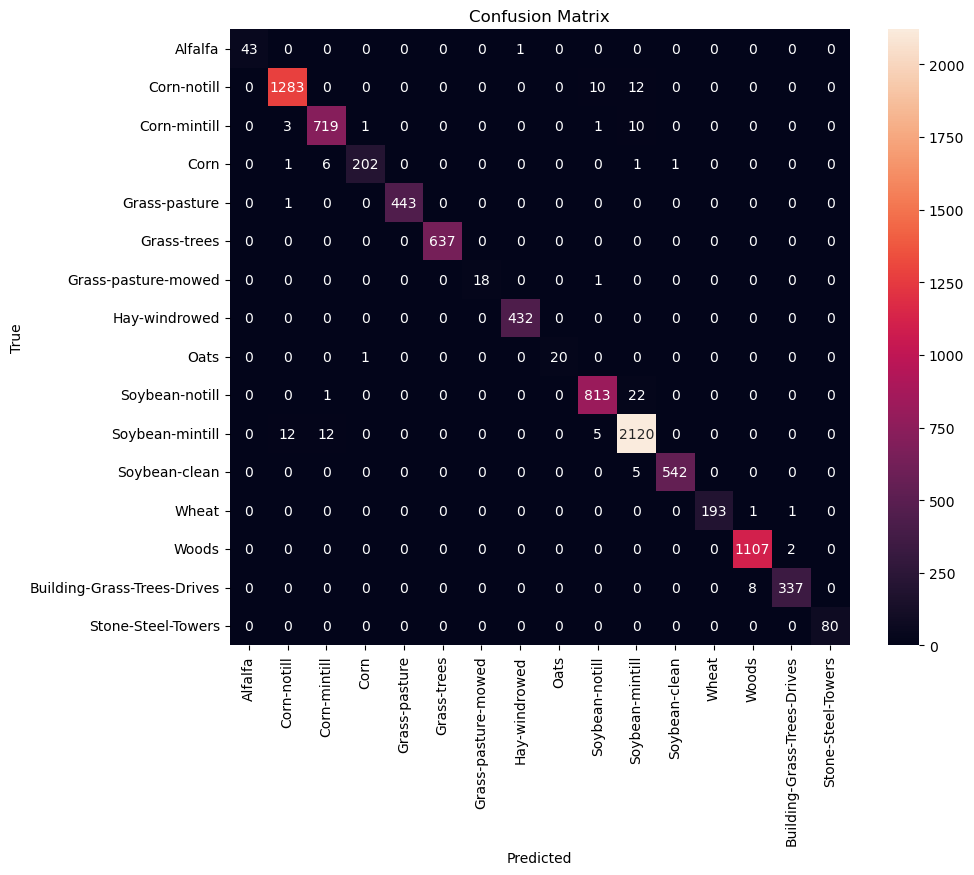

In [128]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

In [129]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [130]:
y_test.value_counts()

11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

In [131]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.99      0.98      0.99      1305
           3       0.97      0.98      0.98       734
           4       0.99      0.96      0.97       211
           5       1.00      1.00      1.00       444
           6       1.00      1.00      1.00       637
           7       1.00      0.95      0.97        19
           8       1.00      1.00      1.00       432
           9       1.00      0.95      0.98        21
          10       0.98      0.97      0.98       836
          11       0.98      0.99      0.98      2149
          12       1.00      0.99      0.99       547
          13       1.00      0.99      0.99       195
          14       0.99      1.00      1.00      1109
          15       0.99      0.98      0.98       345
          16       1.00      1.00      1.00        80

    accuracy                           0.99      9108
   macro avg       0.99   

In [132]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.98, Samples = 44
Class 2: Accuracy = 0.98, Samples = 1305
Class 3: Accuracy = 0.98, Samples = 734
Class 4: Accuracy = 0.96, Samples = 211
Class 5: Accuracy = 1.00, Samples = 444
Class 6: Accuracy = 1.00, Samples = 637
Class 7: Accuracy = 0.95, Samples = 19
Class 8: Accuracy = 1.00, Samples = 432
Class 9: Accuracy = 0.95, Samples = 21
Class 10: Accuracy = 0.97, Samples = 836
Class 11: Accuracy = 0.99, Samples = 2149
Class 12: Accuracy = 0.99, Samples = 547
Class 13: Accuracy = 0.99, Samples = 195
Class 14: Accuracy = 1.00, Samples = 1109
Class 15: Accuracy = 0.98, Samples = 345
Class 16: Accuracy = 1.00, Samples = 80
